# 相関係数

## ピアソンの積率相関係数

:::{admonition} ピアソンの積率相関係数

$$
r = \frac{\operatorname{Cov}(X, Y)}{\sigma_{Y} \sigma_{Y} }
$$

- $\operatorname{Cov}(X, Y)$：XとYの共分散
- $\sigma_{Y}, \sigma_{Y}$：XとYの標準偏差

:::

:::{admonition} ピアソンの積率相関係数（標本レベル）

$$
\hat{r} = \frac{\sum\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sqrt{\sum\left(x_i-\bar{x}\right)^2} \sqrt{\sum\left(y_i-\bar{y}\right)^2}}
$$

- $\hat{r}$：相関係数。$r\in[-1,1]$
- $x_i$：標本における変数$x$の値
- $\bar{x}$：変数$x$の値の平均
- $y_i$：標本における変数$y$の値
- $\bar{y}$：変数$y$の値の平均

:::

## どうやって$[-1,1]$の範囲に収まるよう正規化しているのか？

結論：コーシー・シュワルツの不等式を確率変数にあてはめている。

### 前提：内積

ベクトル空間（要素間の和と定数倍が定義された集合であり、和と定数倍の結果もまた集合の要素であるような集合）における内積について触れておく。

:::{card} （参考）内積の定義

$\mathbb{R}$ 上のベクトル空間 $V$ において、任意の2つのベクトル $\boldsymbol{a}, \boldsymbol{b}$ に対して実数 $\langle \boldsymbol{a}, \boldsymbol{b} \rangle$ が定まり、次の(1)～(4)を満たすとき、$\langle \boldsymbol{a}, \boldsymbol{b} \rangle$ を $\boldsymbol{a}$ と $\boldsymbol{b}$ の 内積 という。

(1) $\langle \boldsymbol{a}, \boldsymbol{b} \rangle = \langle \boldsymbol{b}, \boldsymbol{a} \rangle$

(2) $\langle \boldsymbol{a} + \boldsymbol{b}, \boldsymbol{c} \rangle = \langle \boldsymbol{a}, \boldsymbol{c} \rangle + \langle \boldsymbol{b}, \boldsymbol{c} \rangle$

(3) $\langle k \boldsymbol{a}, \boldsymbol{b} \rangle = k \langle \boldsymbol{a}, \boldsymbol{b} \rangle \quad (k \in \mathbb{R})$

(4) $\langle \boldsymbol{a}, \boldsymbol{a} \rangle \geqq 0$ で，$\langle \boldsymbol{a}, \boldsymbol{a} \rangle = 0 \Longleftrightarrow \boldsymbol{a} = \mathbf{0}$

:::

また、内積$\langle \boldsymbol{a}, \boldsymbol{b} \rangle$とノルム$\|\boldsymbol{a}\| = \sqrt{\langle \boldsymbol{a}, \boldsymbol{a} \rangle}$ についての定理のひとつで **コーシー・シュワルツの不等式** 

$$
\begin{aligned}
& | \langle \boldsymbol{a}, \boldsymbol{b} \rangle |
\leq
\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|
\\
\iff &
- \| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|
\leq 
\langle \boldsymbol{a}, \boldsymbol{b} \rangle
\leq
\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|
\\
\iff &
- 1 \leq 
\frac{\langle \boldsymbol{a}, \boldsymbol{b} \rangle}{\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|}
\leq 1
\end{aligned}
$$

というものが存在する。

なお、$\frac{\langle \boldsymbol{a}, \boldsymbol{b} \rangle}{\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|}$は **コサイン類似度** と呼ばれ、ベクトル間の類似性を示すのでデータサイエンスの世界でよく使われる。


#### 具体的な内積の例

実数空間$\mathbb{R}$上のベクトル空間における内積の定義を満たす関数の例は次の通り。$\boldsymbol{x},\boldsymbol{y}\in \mathbb{R}^n$に対し、

$$
\langle \boldsymbol{x}, \boldsymbol{y} \rangle = \sum_{i=1}^n x_i y_i
$$


### 標本レベルの話

$n$個の観測値からなるベクトル $\boldsymbol{x} = (x_1, x_2, \cdots, x_n)^\top$ と $\boldsymbol{y} = (y_1, y_2, \cdots, y_n)^\top$ があるとする。

またそれらから平均値$\bar{x}, \bar{y}$を引いたベクトルを $\bar{\boldsymbol{x}} = (x_1 - \bar{x}, x_2 - \bar{x}, \cdots, x_n - \bar{x})^\top$、$\bar{\boldsymbol{y}} = (y_1 - \bar{y}, y_2 - \bar{y}, \cdots, y_n - \bar{y})^\top$とする。

標本共分散$\widehat{\operatorname{Cov}}$は

$$
\widehat{\operatorname{Cov}}
= \frac{1}{N} \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})
= \frac{1}{N} \langle \bar{\boldsymbol{x}}, \bar{\boldsymbol{y}} \rangle
$$

$\boldsymbol{x}, \boldsymbol{y}$それぞれの標本標準偏差は

$$
\begin{aligned}
\hat{\sigma}_{\boldsymbol{x}}
&= \sqrt{ \frac{1}{N} \sum_{i=1}^n (x_i - \bar{x})^2 }
= \sqrt{ \frac{1}{N} \sum_{i=1}^n \bar{\boldsymbol{x}}^2 }
= \sqrt{ \frac{1}{N} \langle \bar{\boldsymbol{x}}, \bar{\boldsymbol{x}} \rangle }
\\
\hat{\sigma}_{\boldsymbol{y}}
&= \sqrt{ \frac{1}{N} \sum_{i=1}^n (y_i - \bar{y})^2 }
= \sqrt{ \frac{1}{N} \sum_{i=1}^n \bar{\boldsymbol{y}}^2 }
= \sqrt{ \frac{1}{N} \langle \bar{\boldsymbol{y}}, \bar{\boldsymbol{y}} \rangle }
\end{aligned}
$$

よって

$$
\hat{r}
= \frac{\widehat{\operatorname{Cov}}}{\hat{\sigma}_{\boldsymbol{x}}\hat{\sigma}_{\boldsymbol{y}}}
= \frac{\frac{1}{N} \langle \bar{\boldsymbol{x}}, \bar{\boldsymbol{y}} \rangle}{
\sqrt{ \frac{1}{N} \langle \bar{\boldsymbol{x}}, \bar{\boldsymbol{x}} \rangle }
\sqrt{ \frac{1}{N} \langle \bar{\boldsymbol{y}}, \bar{\boldsymbol{y}} \rangle }
}
= \frac{ \langle \bar{\boldsymbol{x}}, \bar{\boldsymbol{y}} \rangle }
{ \| \bar{\boldsymbol{x}} \| \cdot \| \bar{\boldsymbol{y}} \| }
$$

したがってコーシー・シュワルツの定理

$$
-1 \leq 
\frac{\langle \boldsymbol{a}, \boldsymbol{b} \rangle}{\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|}
\leq 1
$$

より、相関係数の範囲は$[-1,1]$に収まる。


### 期待値と内積

つづいて母集団レベルの話。

確率変数$X,Y$を$L^2$空間の要素（確率空間上の二乗可積分な関数）とすると、その積の期待値$E[XY]$は内積の性質を満たす。

(1) $\langle X, Y \rangle = E[XY] = E[YX] = \langle Y, X \rangle$

(2) $\langle X + Y, Z \rangle = \langle X, Z \rangle + \langle Y, Z \rangle$

(3) $\langle k X, Y \rangle = k \langle X, Y \rangle \quad (k \in \mathbb{R})$

(4) $\langle X, X \rangle = E[X^2] \geqq 0$ かつ $E[X^2] = 0 \iff X = 0 ~ \text{a.s.}$


### 相関係数の導出

コーシー・シュワルツの不等式の内積$\langle \boldsymbol{a}, \boldsymbol{b} \rangle$ を確率変数$A,B$の積の期待値 $E[A B]$ に置き換える。ノルムは例えば確率変数$X$について$\|X\| = \sqrt{\langle X, X \rangle} = E[X^2]$と置き換える。こうしてコーシー・シュワルツの不等式を置き換えた

$$
|E[A B]|^2 \leq E[A^2] E[B^2]
$$

を用いる。

$$
A = (X - E[X]),\quad
B = (Y - E[Y])
$$

とおくと

$$
\begin{aligned}
\big| E\big[ (X - E[X]) (Y - E[Y]) \big] \big|^2
\leq E[(X - E[X])^2] E[(Y - E[Y])^2]\\
\iff
| \operatorname{Cov}(X, Y) |^2
\leq \operatorname{Var}(X) \operatorname{Var}(Y)
\\
\iff
-1 \leq
\frac{ \operatorname{Cov}(X, Y) }{ \sqrt{ \operatorname{Var}(X) } \sqrt{ \operatorname{Var}(Y) } }
\leq 1
\end{aligned}
$$


## 幾何学的解説

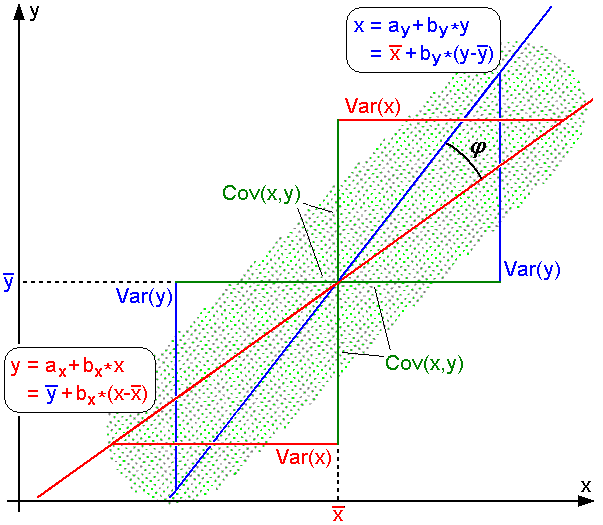

（出所：[Pearson correlation coefficient - Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)）

## 注意点

データの関係性をざっくり表すのが相関係数の良さだが、散布図でみると全然異なるデータであってもたまたま同じ相関係数になることがある。また外れ値にひっぱられる特性もある。

下の図はアンスコムの例と呼ばれる、線形回帰をしたときに同じ傾き係数になるデータセット。
相関係数だと線形回帰と違って切片部分がないため係数は若干異なるがだいたい同じになる。

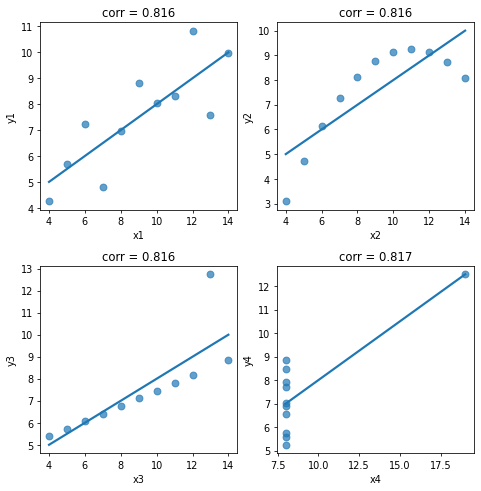

In [53]:
import statsmodels.api as sm
import pandas as pd
anscombe = sm.datasets.get_rdataset("anscombe").data

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=[8,8], dpi=70)
axes = axes.flatten()
fig.subplots_adjust(hspace=0.3)
for i in range(4):
    corr = anscombe.filter(regex=f"{i+1}").corr().iloc[0,1]
    sns.regplot(data=anscombe, x=f"x{i+1}", y=f"y{i+1}", ax=axes[i],
                ci=None, scatter_kws={"s": 50, "alpha": 0.7})
    axes[i].set(title=f"corr = {corr:.3f}")

## A New Coefficient of Correlation

:::{card}

- [Chatterjee, Sourav. "A new coefficient of correlation." Journal of the American Statistical Association 116.536 (2021): 2009-2022.](https://www.tandfonline.com/doi/abs/10.1080/01621459.2020.1758115)
- arxiv: https://arxiv.org/abs/1909.10140

:::

Chatterjee (2021) は 以下の3つの性質をもつ相関係数が定義可能かという問いを立て、これらを満たす新たな相関係数を提案した。

1. シンプル：ピアソンなど古典的な相関係数のように計算が簡単であること
2. 一貫性：相関係数が0となるのは変数が独立な場合のみで、1となるのは一方が他方の可測関数である場合のみであること。
3. 漸近理論：古典的な相関係数のように簡潔な漸近理論をもつ

この新しい相関係数は、変数の分布に関する仮定を必要とせず、非線形な依存関係も捉えることができる。
また、独立性の検定や変数間の関係性の評価において、従来の相関係数よりも優れた性能を示すことが報告されている



$$
\xi_n(X, Y):=1-\frac{3 \sum_{i=1}^{n-1}\left|r_{i+1}-r_i\right|}{n^2-1}
$$

